# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units={units}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | la passe
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | zaozersk
Processing Record 7 of Set 1 | bamut
Processing Record 8 of Set 1 | queenstown
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | nanao
Processing Record 11 of Set 1 | chibougamau
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | batouri
Processing Record 15 of Set 1 | yangor
City not found. Skipping...
Processing Record 16 of Set 1 | polyarnyy
Processing Record 17 of Set 1 | vorkuta
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | constantia
Processing Record 22 of Set 1 | wiecbork
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,16.55,92,40,1.03,GB,1691636418
1,enewetak,11.3474,162.3373,28.71,76,87,6.63,MH,1691636418
2,rio grande,-32.0350,-52.0986,15.53,96,100,5.07,BR,1691636419
3,la passe,45.5549,-0.8967,21.13,76,8,3.15,FR,1691636419
4,port-aux-francais,-49.3500,70.2167,3.11,95,100,10.89,TF,1691636419


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,16.55,92,40,1.03,GB,1691636418
1,enewetak,11.3474,162.3373,28.71,76,87,6.63,MH,1691636418
2,rio grande,-32.0350,-52.0986,15.53,96,100,5.07,BR,1691636419
3,la passe,45.5549,-0.8967,21.13,76,8,3.15,FR,1691636419
4,port-aux-francais,-49.3500,70.2167,3.11,95,100,10.89,TF,1691636419


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

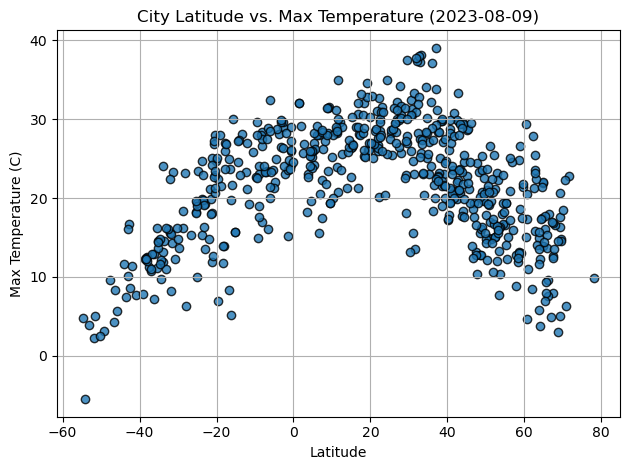

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.8, edgecolors="black", linewidth=1, marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({datetime.today().strftime('%Y-%m-%d')})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

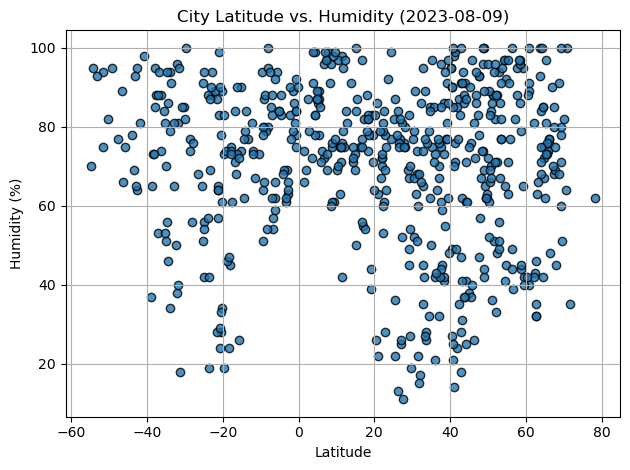

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.8, edgecolors="black", linewidth=1, marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({datetime.today().strftime('%Y-%m-%d')})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

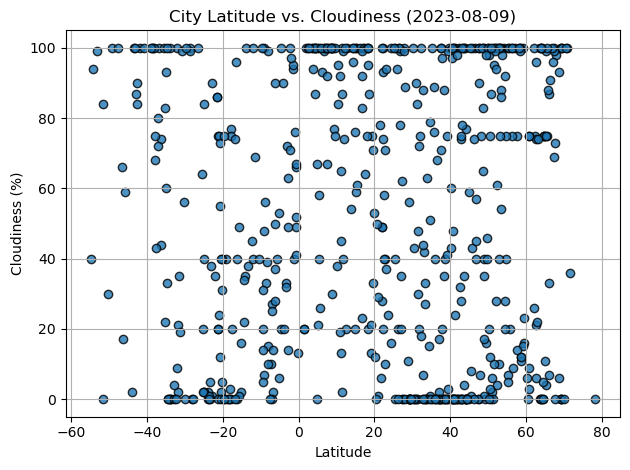

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.8, edgecolors="black", linewidth=1, marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({datetime.today().strftime('%Y-%m-%d')})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

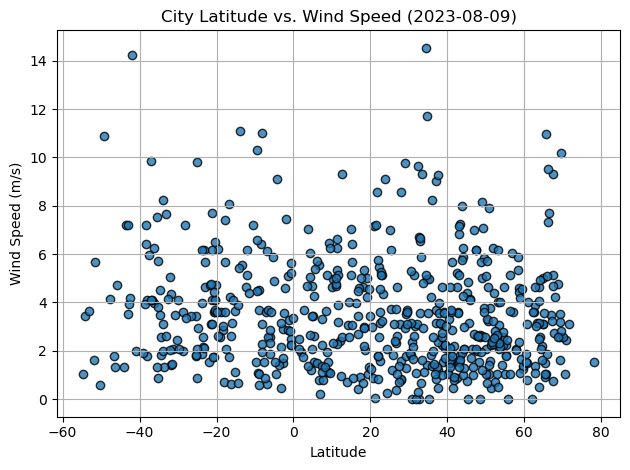

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.8, edgecolors="black", linewidth=1, marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({datetime.today().strftime('%Y-%m-%d')})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
# Credit/Acknowledgement: https://github.com/yeyanwang/python-api-challenge/blob/main/WeatherPy/WeatherPy.ipynb
def plot_linear_regression(x_values, y_values, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(f"{x_values.name}")
    plt.ylabel(f"{y_values.name}")
    print(f"The r-value is {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,16.55,92,40,1.03,GB,1691636418
1,enewetak,11.3474,162.3373,28.71,76,87,6.63,MH,1691636418
3,la passe,45.5549,-0.8967,21.13,76,8,3.15,FR,1691636419
5,zaozersk,69.4005,32.4476,20.60,71,0,1.64,RU,1691636419
6,bamut,43.1599,45.1973,23.73,62,0,1.82,RU,1691636419


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rio grande,-32.0350,-52.0986,15.53,96,100,5.07,BR,1691636419
4,port-aux-francais,-49.3500,70.2167,3.11,95,100,10.89,TF,1691636419
7,queenstown,-31.8976,26.8753,8.24,81,21,1.43,ZA,1691636008
12,adamstown,-25.0660,-130.1015,19.33,56,84,9.81,PN,1691636023
21,edinburgh of the seven seas,-37.0676,-12.3116,10.68,53,80,9.85,SH,1691636422


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6254760971688608


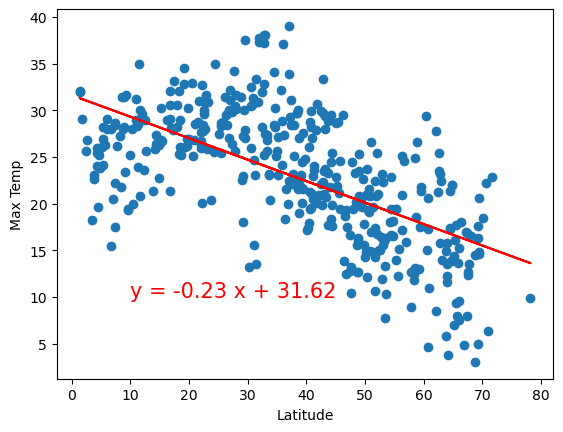

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, 10))

The r-value is 0.7894072971529243


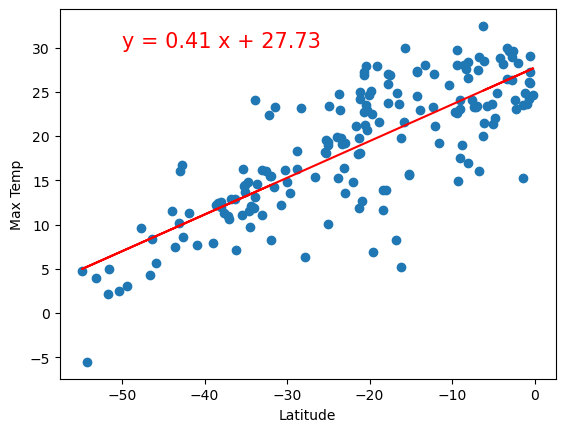

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-50, 30))


**Discussion about the linear relationship:**
* Northern Hemisphere: The regression plot shows that as the latitude (i.e., distance from the equator) increases, the temperature decreases.
* Southern Hemisphere: The regression plot shows that as the latitude (i.e., distance from the equator) decreases, the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.07279139418014466


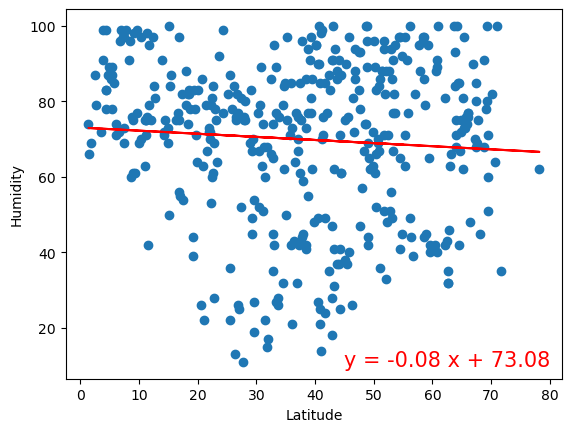

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (45, 10))


The r-value is -0.013610468824005973


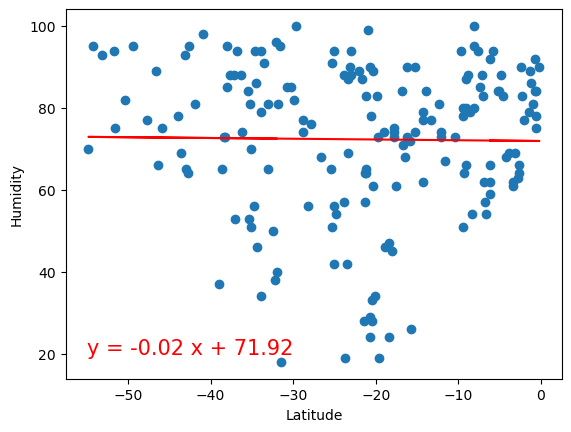

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-55, 20))


**Discussion about the linear relationship:**
* Northern Hemisphere: The regression plot shows essentially no correlation between humidity and latitude, indicating that distance from the equator has essentially no relevant impact on humidity.
* Southern Hemisphere: The regression plot shows essentially no correlation between humidity and latitude, indicating that distance from the equator has essentially no relevant impact on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.12564100908333917


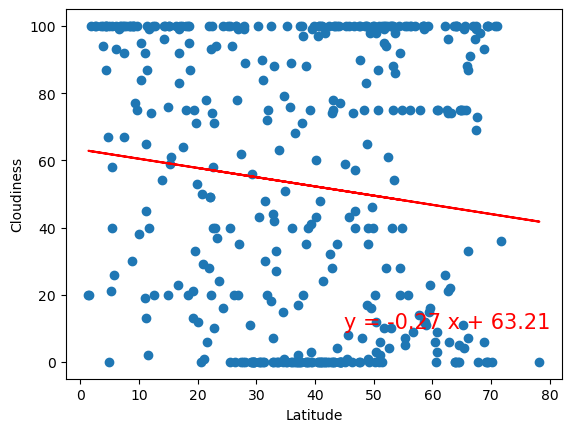

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (45, 10))


The r-value is -0.1737925961258219


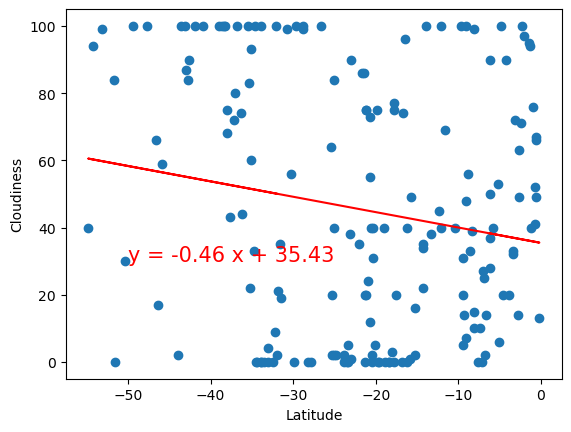

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 30))


**Discussion about the linear relationship:**
* Northern Hemisphere: The regression plot shows that as latitude (i.e., distance from the equator) increases, cloudiness decreases.
* Southern Hemisphere: The regression plot shows that as latitude (i.e, distance from the equator) decreases, cloudiness decreases as well.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.03207349063468551


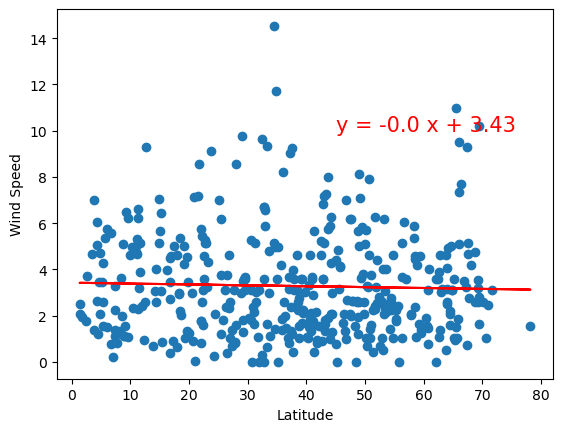

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (45, 10))


The r-value is -0.07781052769686546


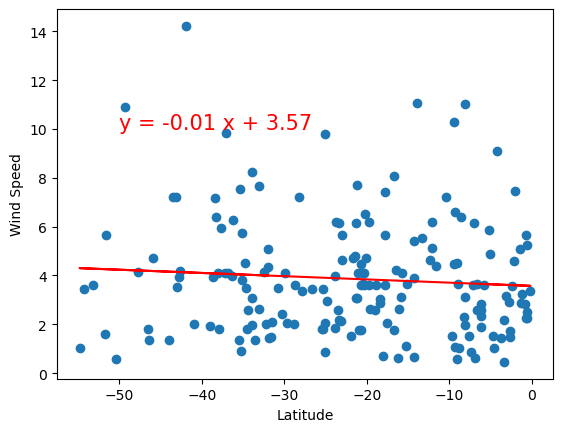

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 10))


**Discussion about the linear relationship:**
* Northern Hemisphere: The regression plot shows that as latitude increases, wind speed slightly decreases.
* Southern Hemisphere: The regression plot shows that as latitude (distance from the equator) decreases, wind speed also decreases.